UCB Nedir ? 


Algoritmanın kabulü, “her olayın arkasında bir dağılım vardır”. Peki bu dağılımları nasıl en avantajlı hale çevirebiliriz?


• Kullanıcı her seferinde bir eylem yapar (event - e)

• Bu eylem karşılığında bir skor döner (örneğin web tıklaması 1 ve tıklanmaması 0)


• Amacımız tıklamaları max çıkarmak.


Yani eski tecrübelerden yararlanıp , hangi reklam daha çok ağır basıyorsa ona ağırlık veren bir algoritmadan bahsediyoruz.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [50]:
veriler = pd.read_csv('C:/Users/yusuf/Desktop/GOALS/MACHINE LEARNING/Basic/kaynaklar/Ads_CTR_Optimisation.csv')

veriler.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [51]:
veriler.values

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

Yapacağımız işlemler şunlar olacaktır.

1 ADIM : Her turda (tur sayısı burada n olsun) her reklam altrenatifi(i) aşağıdaki sayılarda tutulur.

Ni: i sayılı reklamın o ana kadarki tıklama sayısı

Ri: o ana kadar ki i reklamından gelen 1 ve 0 'ların yani ödüllerin toplamı..





2.ADIM: Yukaruda bu iki sayıdan aşağıdaki değerler hesaplanır.

O ana kadar ki her reklamın ortalama ödülü Ri/Ni

GÜVEN ARALIĞI için aşağı ve yukarı oynama potansiyeli içinse √3log(n)/2Ni ifadesi hesaplanır.


n : tur sayısı
Ni: i sayılı reklamın o ana kadarki tıklanma sayısı



3.ADIM : MAX UCB DEĞERİ SAHİP OLAN ÖNEMLİ.


UCB= GÜVEN ARALIĞI + ORTALAMA


In [52]:
N=10000
oduller = [0] * 10 #ilk başta tüm ilanların odülü sıfır.
#Ri için
toplamOdul=0 # toplam odul hesaplamak ve tanımlamak.
#Ni için
tıklamalar=[0]*10 # o ana kadar olan tıklama sayısı.
secilenler = []
for n in range(0,N):
    ilan=0  # seçilen reklam 
    maxUCB=0
    
    for i in range(0,10): #bu for'un amacı 10 tane reklamın içinde en yüksek olanı bul demek için kullandım.
        if(tıklamalar[i]>0):

            ortalama=oduller[i]/ tıklamalar[i]
            guvenAralığı=math.sqrt(3/2* math.log(n)/tıklamalar[i])
            ucb=ortalama+ guvenAralığı

        else:
            ucb=N*10
        if maxUCB < ucb: # eğer ucb değeri diğerlerinden yüksekse yeni ucb değerim o olacak.
            maxUCB= ucb
            ilan= i #en yüksek ucb değere sahip olan ilana ağırlık verecez artık.
    secilenler.append(ilan) #ilanların hepsini bir boş bir liste'de tutuyoruz.
    tıklamalar[ilan]= tıklamalar[ilan] +1 # reklam sayısını bir artırmamız gerekiyor yoksa hep aynı değeri döndürür.
    odul=veriler.values[n,ilan]
    oduller[ilan]= oduller[ilan] + odul # bir ödül döndüyse ilanın ödülünü de 0 veya 1 olarak ekle.
    toplamOdul= toplamOdul + odul

In [53]:
ilan

4

In [54]:
toplamOdul

2211

(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

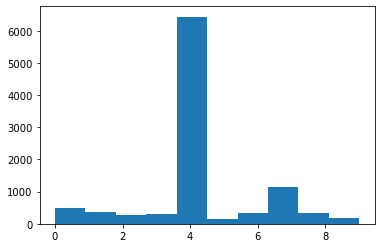

In [55]:
plt.hist(secilenler) #her bir ilandan ne kadar seçildiği 